

# Data Analysis with Python



## Objectives


   ## Explore features or charecteristics to predict price (PCC) of car and analysis of a binary classification problem.


<h2>Table of Contents</h2>


    1.Import Data from Module
    2.Analyzing Individual Feature Patterns using Visualization
    3.Descriptive Statistical Analysis
    4.Basics of Grouping
    5.Correlation and Causation
    6.ANOVA
    7.Analysis of a binary classification problem
    



<h3>What are the main characteristics that have the most impact on the car price?</h3>


<h2 id="import_data">1. Import Data </h2>


<h4>Setup</h4>


Import libraries:


In [123]:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3
#! mamba install numpy=1.21.2
#! mamba install scipy=1.7.1-y
#!  mamba install seaborn=0.9.0-y

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the data and store it in dataframe `df`:


This dataset was hosted on GITHUB djinasarre becars_eda repository. Click <a href="https://github.com/djinasarre/becars_eda/raw/main/VENDIDOS1MESEDA.xlsx">HERE</a> for download.


In [125]:
path='https://github.com/djinasarre/becars_eda/raw/main/VENDIDOS1MESEDA.xlsx'
df = pd.read_excel(path)
df.head()
df.shape

(393, 32)

<h2 id="pattern_visualization">2. Analyzing Individual Feature Patterns Using Visualization</h2>


To install Seaborn we use pip, the Python package manager.


Import visualization packages "Matplotlib" and "Seaborn". Don't forget about "%matplotlib inline" to plot in a Jupyter notebook.


In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<h4>How to choose the right visualization method?</h4>
<p>When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.</p>


In [127]:
# list the data types for each column
print(df.dtypes)

MARCA MODELO         object
MOTOR               float64
CAMBIO               object
CV                    int64
COMBUSTIBLE          object
COLOR                object
YEARS                 int64
PLAZAS              float64
PCC                 float64
PCOMPRA             float64
PVENTA                int64
BRUTO               float64
NETO                float64
KM                    int64
C AUTO1             float64
tipo                 object
llantas              object
C.P                   int64
localidad            object
provincia            object
pais                 object
nacionalidad         object
sexo                 object
edad                float64
year                  int64
CTE.GARANTÍA        float64
CTE..PREPARACIÓN    float64
CTE.TOTAL           float64
BF.NETO             float64
GARANTIA            float64
MESES               float64
GARANTIA2            object
dtype: object


1- MARCA MODELO        MODEL BRAND  
2- MOTOR               ENGINE 
3- CAMBIO              GEARBOX
4- CV                  HORSEPOWER (1HP is 1.0138hp and 1hp is 0.9863HP)
5- COMBUSTIBLE         FUEL
6- COLOR               COLOUR
7- YEARS               vehicle age
8- PLAZAS              SEATS
9- PCC                 PURCHASE PRICE
10- PCOMPRA            PURCHASE PRICE WITHOUT COMISSION
11- PVENTA             SALE PRICE
12- BRUTO              GROSS MARGIN
13- NETO               NET margin
14- KM                 KM
15- C AUTO1            COMMISSION 
16- tipo               CAR TYPE
17- llantas            WHEEL TYPE
18- C.P                ZIP CODE            
19- localidad          LOCALITY
20- provincia          PROVINCE
21- pais               COUNTRY
22- nacionalidad       NATIONALITY
23- sexo               SEX
24- edad               BUYER AGE
25- year               YEAR OF SALE
26- CTE.GARANTÍA       WARRANTY COST 
27- CTE..PREPARACIÓN   PREPARATION COST  
28- CTE.TOTAL          TOTAL COST 
29- BF.NETO            NET PROFIT 
30- GARANTIA           WARRANTY ( 1 warrantied car, 2 no warrantied car)
31- MESES              MONTHS binary ( 1 good sale, 2 bad sale)
32- GARANTIA2          WARRANTY2 ( si= warrantied car, no= no warrantied car)

For example, we can calculate the correlation between variables  of type "int64" or "float64" using the method "corr":


In [128]:
df.corr()

,MOTOR,CV,YEARS,PLAZAS,PCC,PCOMPRA,PVENTA,BRUTO,NETO,KM,C AUTO1,C.P,edad,year,CTE.GARANTÍA,CTE..PREPARACIÓN,CTE.TOTAL,BF.NETO,GARANTIA,MESES
MOTOR,1.000000,0.792832,-0.131994,0.189301,0.448297,0.463403,0.501080,0.212952,0.212952,0.268752,-0.257052,-0.025750,-0.081331,-0.298011,-0.001592,-0.010909,-0.103200,0.190207,0.102264,-0.064860
CV,0.792832,1.000000,-0.038420,0.189880,0.463622,0.469042,0.516145,0.246306,0.246306,0.234273,-0.203508,0.014473,-0.137837,-0.074722,0.126176,-0.008152,-0.015159,0.160300,0.030823,-0.083222
YEARS,-0.131994,-0.038420,1.000000,0.004036,-0.657315,-0.677523,-0.655693,-0.047513,-0.047513,0.347413,0.265068,-0.017406,0.062976,0.704811,0.035476,0.099390,0.184031,-0.108379,0.135810,0.077076
PLAZAS,0.189301,0.189880,0.004036,1.000000,0.097727,0.097782,0.152173,0.166439,0.166439,0.041582,0.045835,-0.026473,-0.093990,-0.059062,-0.001474,0.023002,0.001553,0.135274,-0.012431,-0.044513
PCC,0.448297,0.463622,-0.657315,0.097727,1.000000,0.995800,0.957807,0.049565,0.049565,-0.284729,-0.104820,0.052423,-0.032040,-0.368248,-0.018624,-0.076771,-0.105659,0.004172,-0.072833,-0.055965
PCOMPRA,0.463403,0.469042,-0.677523,0.097782,0.995800,1.000000,0.956607,0.031803,0.031803,-0.260908,-0.224919,0.044708,-0.044734,-0.408838,-0.022590,-0.092498,-0.159831,0.028040,-0.057214,-0.063617
PVENTA,0.501080,0.516145,-0.655693,0.152173,0.957807,0.956607,1.000000,0.321656,0.321656,-0.288548,-0.112001,0.063709,-0.037326,-0.413948,0.007882,-0.018390,-0.058706,0.215465,-0.113114,-0.123804
BRUTO,0.212952,0.246306,-0.047513,0.166439,0.049565,0.031803,0.321656,1.000000,1.000000,-0.141943,0.302412,0.073252,0.020470,-0.091385,0.090609,0.219090,0.297817,0.563006,-0.169582,-0.182656
NETO,0.212952,0.246306,-0.047513,0.166439,0.049565,0.031803,0.321656,1.000000,1.000000,-0.141943,0.302412,0.073252,0.020470,-0.091385,0.090609,0.219090,0.297817,0.563006,-0.169582,-0.182656
KM,0.268752,0.234273,0.347413,0.041582,-0.284729,-0.260908,-0.288548,-0.141943,-0.141943,1.000000,-0.312217,0.006566,-0.116330,0.092463,0.039675,-0.028941,-0.111484,-0.003159,0.279922,0.166487


The diagonal elements are always one; we will study correlation more precisely Pearson correlation in-depth at the end of the notebook.


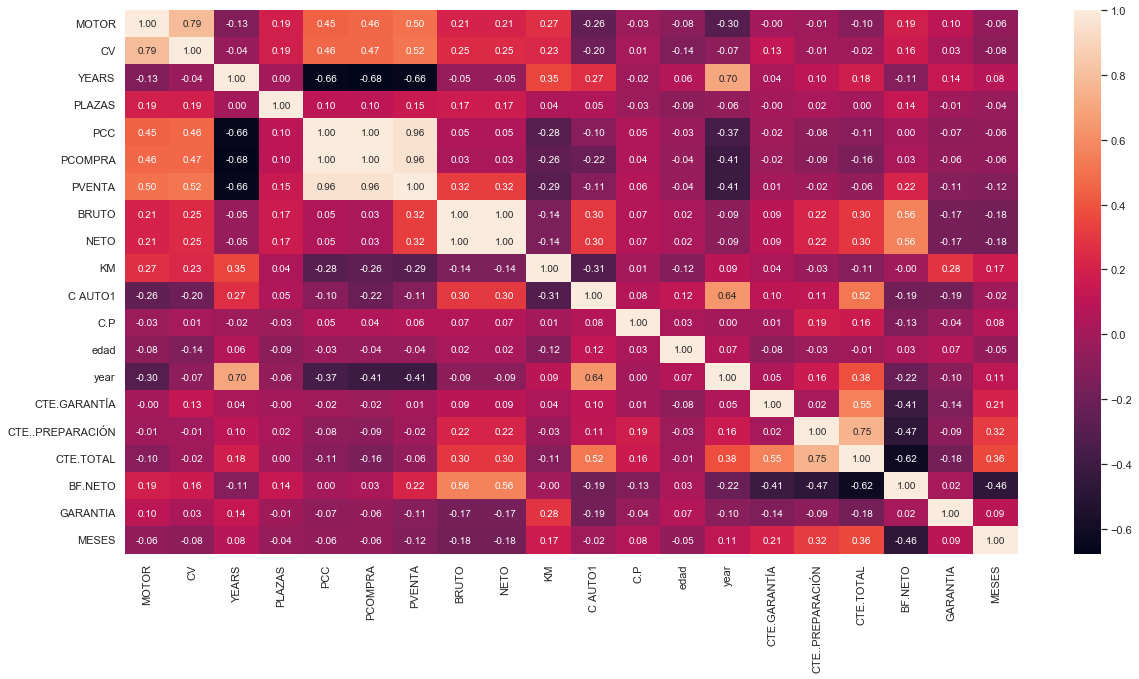

In [129]:
fig, ax = plt.subplots(figsize = (20, 10))

sns.heatmap(df.corr(), annot=True, fmt = '.2f')

If we focus on our target PCC( purchase price) we can see that the variables with which it has a greater correlation are:
    • MOTOR → -0.45
    • CV → 0.46
    • YEARS → -0.66 (vehicle age)
    • PCOMPRA → 1
    • PVENTA → 0.96
    ++ PCOMPRA=PURCHASE PRICE WITHOUT COMMISSIONS AND PVENTA=SALE PRICE, HAVE THE MAXIMUM CORRELATION BECAUSE THEY DEPEND
     ENTIRELY ON THE PCC= PURCHASE PRICE++
    • year → 0.37 (year of sale)
    
    #We can also see high correlations among other variables:

MOTOR has a correlation of 0.79 with CV
YEARS(vehicule age) has a correlation of -0.66 and -0.70 with the variables PCC and year respectively.
CTE.TOTAL has a correlation of -0.75 and 0.62 with CTE.PREPARACIÓN and BF.NETO respectively.

In [130]:
#Dropping unnecessary issues due to save memory and to avoid issues
df = df.drop('PCOMPRA', 1).drop('PVENTA', 1).drop('BRUTO', 1).drop('NETO', 1)

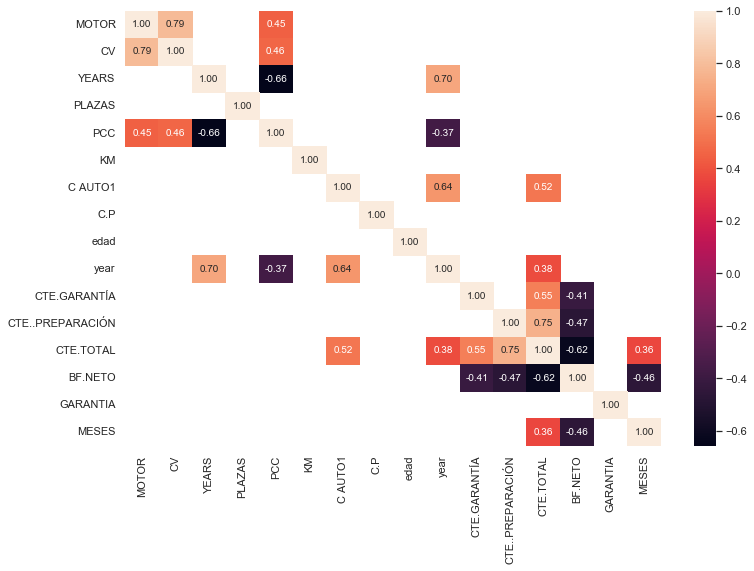

In [131]:
fig, ax = plt.subplots(figsize = (12, 8))

sns.heatmap(df.corr()[(df.corr() > 0.35) | (df.corr() < -0.35)], annot=True, fmt = '.2f')

<p>Find the correlation between the following columns: MOTOR, CV, YEARS and year.</p>

In [132]:
df[['MOTOR', 'CV', 'YEARS', 'year']].corr()

,MOTOR,CV,YEARS,year
MOTOR,1.000000,0.792832,-0.131994,-0.298011
CV,0.792832,1.000000,-0.038420,-0.074722
YEARS,-0.131994,-0.038420,1.000000,0.704811
year,-0.298011,-0.074722,0.704811,1.000000


<h2>Continuous Numerical Variables:</h2> 

<p>Continuous numerical variables are variables that may contain any value within some range. They can be of type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.</p>

<p>In order to start understanding the (linear) relationship between an individual variable and the price, we can use "regplot" which plots the scatterplot plus the fitted regression line for the data. This will be useful later on for visualizing the fit of the simple linear regression model as well. </p>


Let's see several examples of different linear relationships:


<h3>Positive Linear Relationship</h4>


Let's find the scatterplot of "MOTOR" and "PCC".


(0, 18372.566694260488)

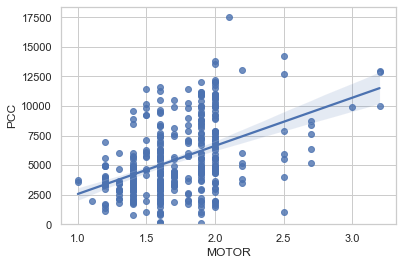

In [133]:
# Engine size as potential predictor variable of price
sns.regplot(x="MOTOR", y="PCC", data=df)
plt.ylim(0,)

<p>As the MOTOR goes up, the PCC goes up: this indicates a positive direct correlation between these two variables. MOTOR size seems like a good predictor of price since the regression line is almost a diagonal line.</p>


We can examine the correlation between 'MOTOR' and 'PCC' and see that it's approximately 0.45.


In [134]:
df[["MOTOR", "PCC"]].corr()

,MOTOR,PCC
MOTOR,1.000000,0.448297
PCC,0.448297,1.000000


<h3>Weak Linear Relationship</h3>


Let's see if "peak-rpm" is a predictor variable of "price".


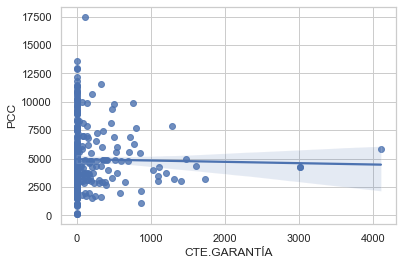

In [135]:
sns.regplot(x="CTE.GARANTÍA", y="PCC", data=df)

<p>CTE.GARANTÍA does not seem like a good predictor of the PCC (purchase price) at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore, it's not a reliable variable.</p>


We can examine the correlation between 'CTE.GARANTÍA' and 'PCC' and see it's approximately -0.02.

In [136]:
df[['CTE.GARANTÍA','PCC']].corr()

,CTE.GARANTÍA,PCC
CTE.GARANTÍA,1.000000,-0.018624
PCC,-0.018624,1.000000


<h3>Categorical Variables</h3>

<p>These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots. </p>


Let's look at the relationship between "MARCA MODELO" and "PCC".


Text(0.5, 1.0, 'Marca Modelo precio de compra')

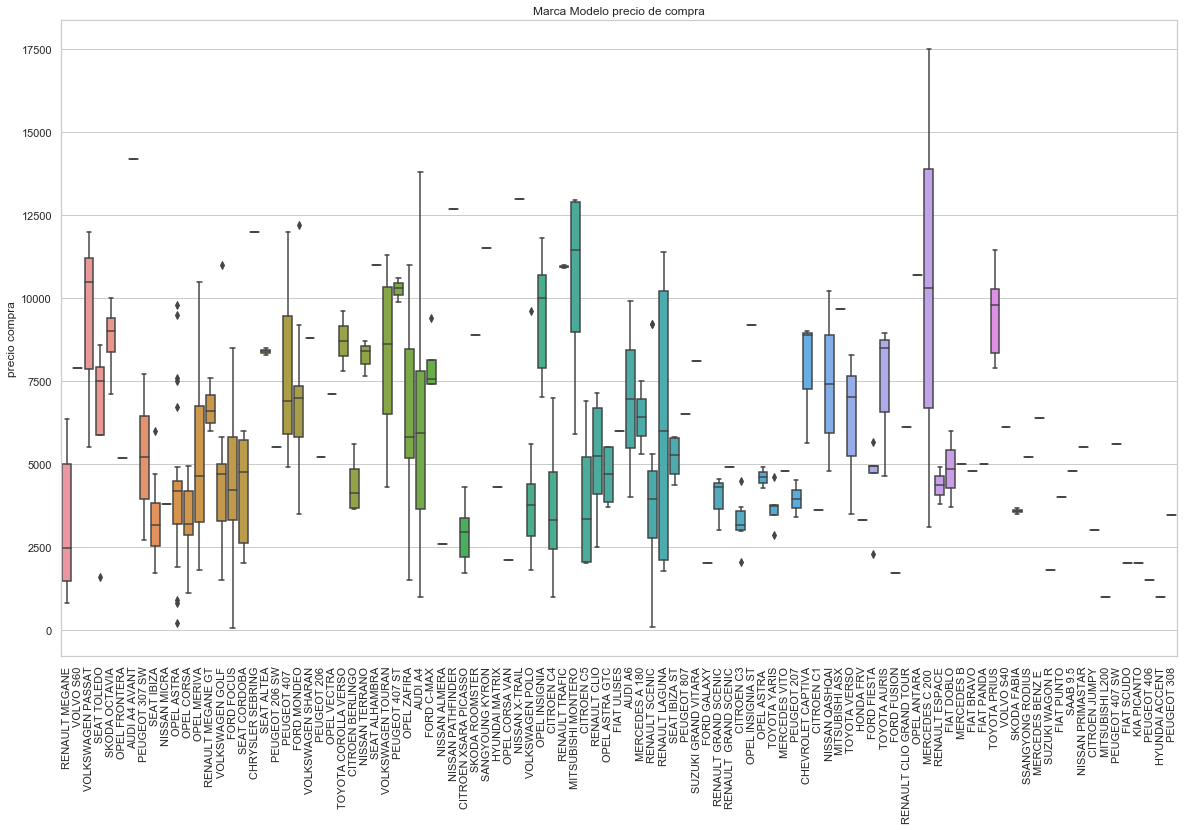

In [137]:
sns.set(style="whitegrid")

a4_dims = (20, 11.7)
fig, ax = plt.subplots(figsize=a4_dims)

ax = sns.boxplot(x='MARCA MODELO', y="PCC",data=df)
ax.set(xlabel='', ylabel='precio compra') 
props = {"rotation" : 90}
plt.setp(ax.get_xticklabels(), **props)

plt.title('Marca Modelo precio de compra')

We see that the distributions of PCC between the different MARCA MODELO categories have a significant overlap, so MARCA MODELO 
would not be a good predictor of price.

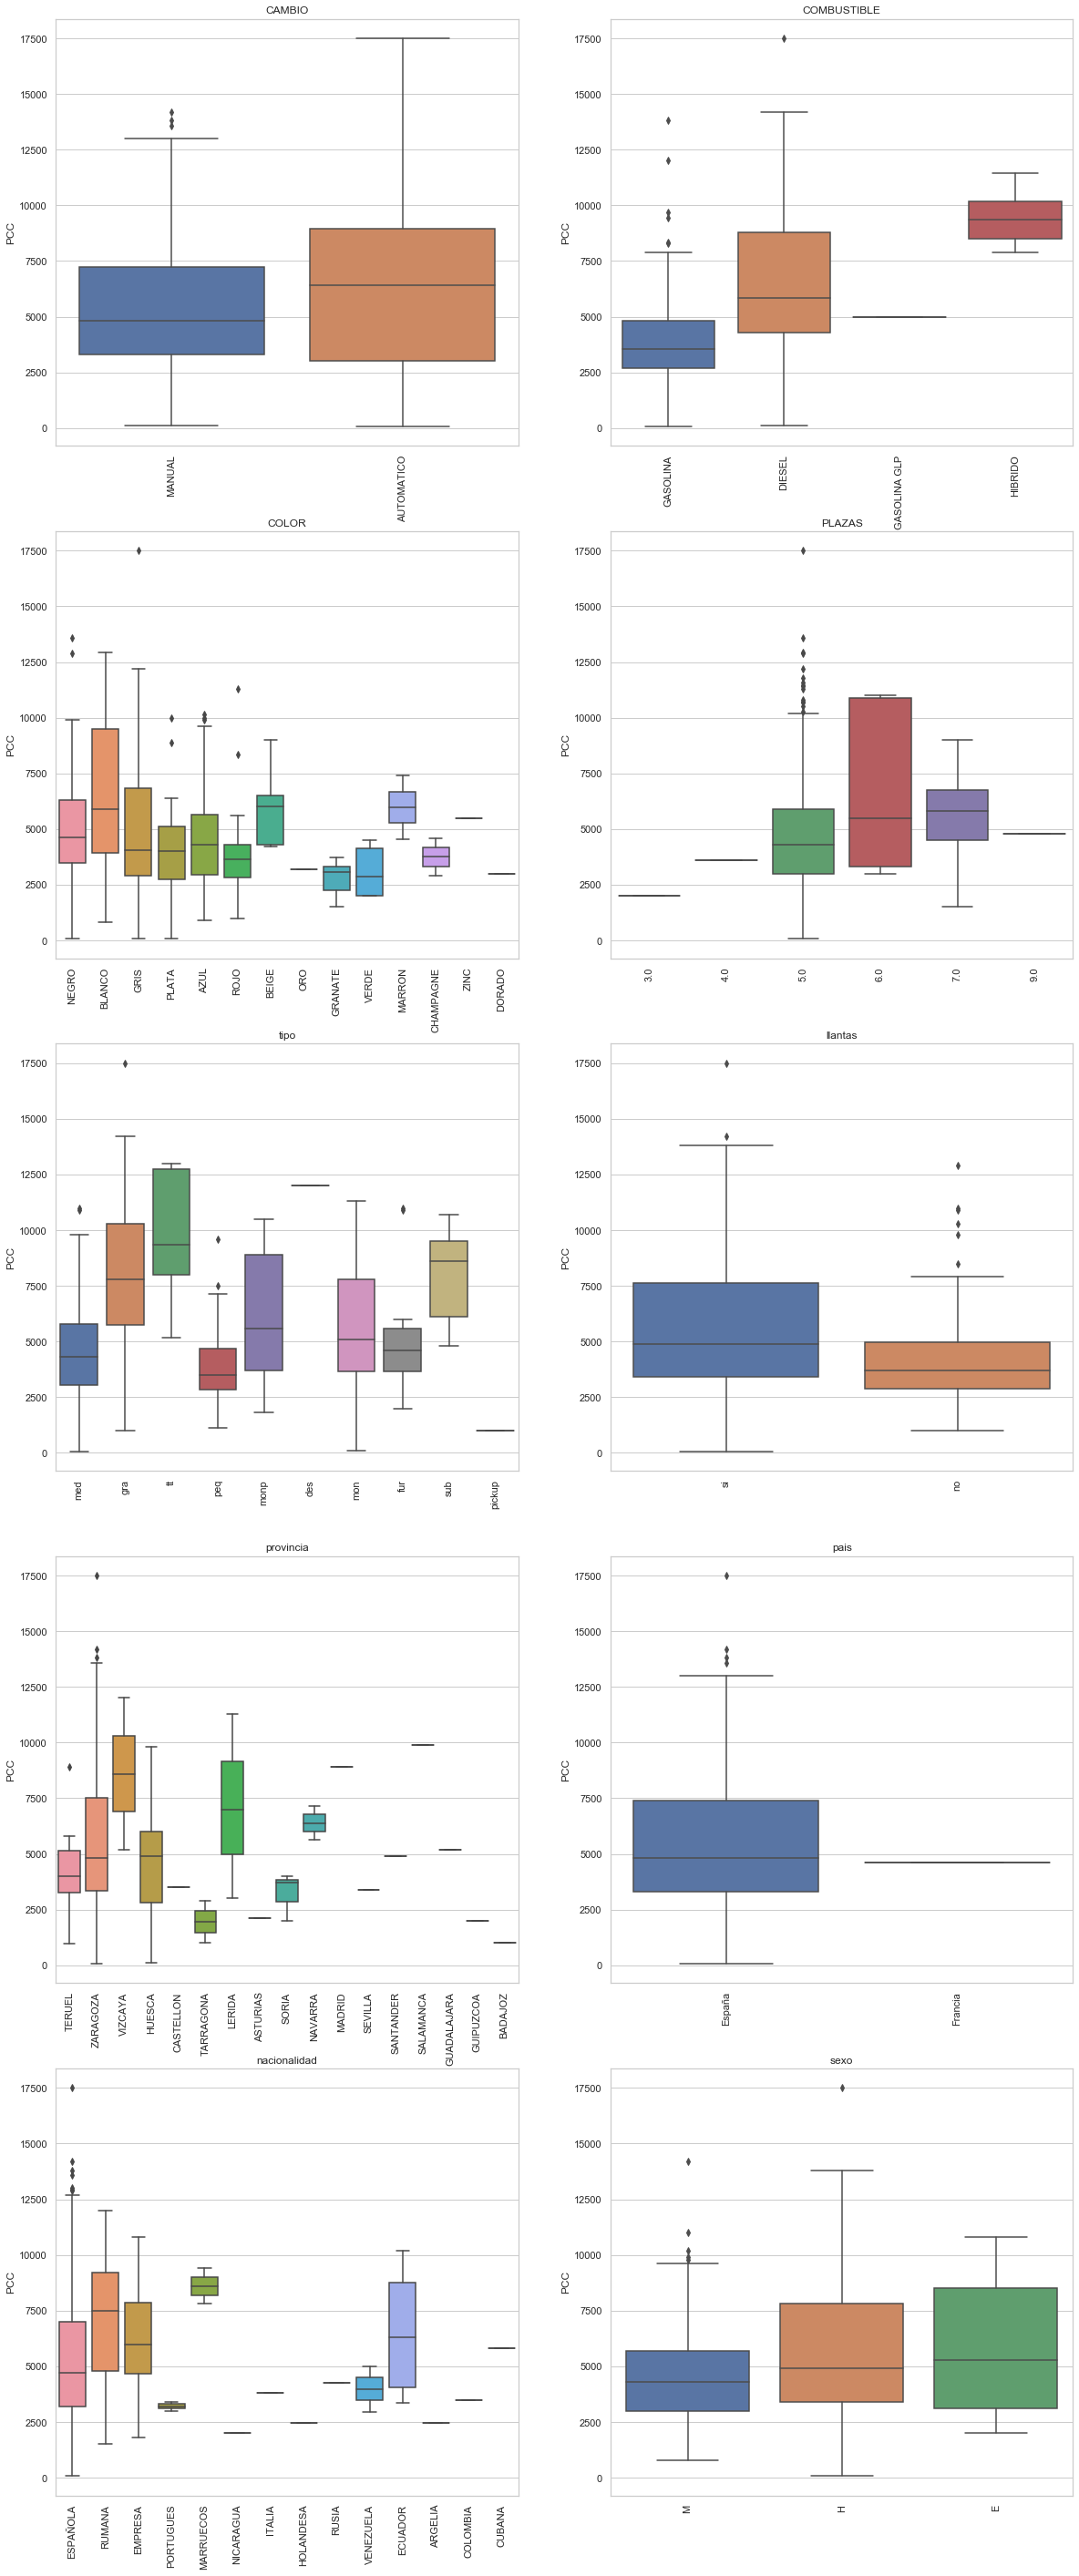

In [138]:
categ_col = ['CAMBIO', 'COMBUSTIBLE', 'COLOR', 'PLAZAS', 'tipo', 'llantas', 'provincia','pais', 'nacionalidad', 'sexo']
fig, ax = plt.subplots(nrows=int(np.ceil(len(categ_col)/2)), ncols = 2, figsize = (20, 50))

i,j = 0,0
for c in categ_col:
    sns.boxplot(x = c, y = 'PCC', data = df, ax = ax[i,j], )
    ax[i,j].set_title(c)
    ax[i,j].set_xlabel('')
    props = {"rotation" : 90}
    plt.setp(ax[i,j].get_xticklabels(), **props)
    
    j+=1
    if j==2:
        j=0
        i+=1

<p>Here we see that most of categorical variables categories have a significant overlap only the distribution of PCC between  COMBUSTIBLE (fuel) categories, gasolina, diesel and hibrido, are distinct enough to take combustible as a potential good predictor of price, We also observe that gasoline with elevated PCCs are outliers.</p>


<h2 id="discriptive_statistics">3. Descriptive Statistical Analysis</h2>


<p>Let's first take a look at the variables by utilizing a description method.</p>

<p>The <b>describe</b> function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.</p>

This will show:

<ul>
    <li>the count of that variable</li>
    <li>the mean</li>
    <li>the standard deviation (std)</li> 
    <li>the minimum value</li>
    <li>the IQR (Interquartile Range: 25%, 50% and 75%)</li>
    <li>the maximum value</li>
<ul>


We can apply the method "describe" as follows:


In [139]:
df.describe()

,MOTOR,CV,YEARS,PLAZAS,PCC,KM,C AUTO1,C.P,edad,year,CTE.GARANTÍA,CTE..PREPARACIÓN,CTE.TOTAL,BF.NETO,GARANTIA,MESES
count,393.000000,393.000000,393.000000,294.000000,393.000000,393.000000,227.000000,393.000000,292.000000,393.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,1.718066,108.793893,7.801527,5.149660,5484.089924,84631.949109,256.513260,48295.582697,45.863014,2014.900763,174.215850,906.777245,1276.243129,1099.282367,1.105442,1.353741
std,0.334503,24.715850,3.575897,0.570656,3031.181519,46115.967570,341.031784,7730.852859,13.276147,4.061118,443.292311,576.954165,838.456266,968.488112,0.307646,0.478945
min,1.000000,60.000000,0.000000,3.000000,70.000000,36.000000,0.000000,6500.000000,19.000000,2008.000000,0.000000,0.000000,0.000000,-7921.250248,1.000000,1.000000
25%,1.500000,90.000000,4.000000,5.000000,3300.000000,56138.000000,0.000000,50005.000000,36.000000,2009.000000,0.000000,528.250000,690.460000,658.721508,1.000000,1.000000
50%,1.600000,109.000000,8.000000,5.000000,4800.000000,76897.000000,0.000000,50012.000000,45.000000,2016.000000,0.000000,822.655000,1122.630000,1114.877975,1.000000,1.000000
75%,1.900000,125.000000,10.000000,5.000000,7400.000000,103041.000000,509.500000,50022.000000,55.000000,2018.000000,150.037500,1143.342500,1681.552500,1603.283698,1.000000,2.000000
max,3.200000,233.000000,19.000000,9.000000,17501.000000,517595.000000,1950.000000,122919.000000,79.000000,2022.000000,4099.790000,3858.190000,5035.290000,3498.787190,2.000000,2.000000


The default setting of "describe" skips variables of type object. We can apply the method "describe" on the variables of type 'object' as follows:


In [140]:
df.describe(include=['object'])

,MARCA MODELO,CAMBIO,COMBUSTIBLE,COLOR,tipo,llantas,localidad,provincia,pais,nacionalidad,sexo,GARANTIA2
count,393,393,393,294,393,393,393,392,393,393,393,294
unique,101,2,4,14,10,2,85,17,2,14,3,2
top,OPEL ASTRA,MANUAL,DIESEL,GRIS,med,si,ZARAGOZA,ZARAGOZA,España,ESPAÑOLA,H,si
freq,33,376,236,80,107,338,262,355,392,337,287,263


<h3>Value Counts</h3>


<p>Value counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the "value_counts" method on the column "COMBUSTIBLE". Don’t forget the method "value_counts" only works on pandas series, not pandas dataframes. As a result, we only include one bracket <code>df['COMBUSTIBLE']</code>, not two brackets <code>df[['COMBUSTIBLE']]</code>.</p>


In [141]:
df['COMBUSTIBLE'].value_counts()

DIESEL          236
GASOLINA        150
HIBRIDO           6
GASOLINA GLP      1
Name: COMBUSTIBLE, dtype: int64

We can convert the series to a dataframe as follows:


In [142]:
df['COMBUSTIBLE'].value_counts().to_frame()

,COMBUSTIBLE
DIESEL,236
GASOLINA,150
HIBRIDO,6
GASOLINA GLP,1


Let's repeat the above steps but save the results to the dataframe "COMBUSTIBLE_counts" and rename the column  'COMBUSTIBLE' to 'value_counts'.


In [143]:
COMBUSTIBLE_counts = df['COMBUSTIBLE'].value_counts().to_frame()
COMBUSTIBLE_counts.rename(columns={'COMBUSTIBLE': 'value_counts'}, inplace=True)
COMBUSTIBLE_counts

,value_counts
DIESEL,236
GASOLINA,150
HIBRIDO,6
GASOLINA GLP,1


Now let's rename the index to 'drive-wheels':


In [144]:
COMBUSTIBLE_counts.index.name = 'COMBUSTIBLE'
COMBUSTIBLE_counts

,value_counts
COMBUSTIBLE,
DIESEL,236
GASOLINA,150
HIBRIDO,6
GASOLINA GLP,1


<p>After examining the value counts of the COMBUSTIBLE, we see that COMBUSTIBLE would not be so good predictor variable for the PCC. This is because we only have 1 cars with GASOLINA GLP and 6 with HIBRIDO, so this result is skewed. Thus, we are not able to draw any conclusions about the COMBUSTIBLE.</p>


<h2 id="basic_grouping">4. Basics of Grouping</h2>


<p>The "groupby" method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.</p>

<p>For example, let's group by the variable "COMBUSTIBLE". We see that there are 4 different categories of COMBUSTIBLE.</p>


In [145]:
df['COMBUSTIBLE'].unique()

array(['GASOLINA', 'DIESEL', 'GASOLINA GLP', 'HIBRIDO'], dtype=object)

<p>If we want to know, on average, which type of COMBUSTIBLE ( fuel) is most valuable, we can group "COMBUSTIBLE" and then average them.</p>

<p>We can select the columns 'COMBUSTIBLE', 'llantas'(wheels type) and 'PCC', then assign it to the variable "df_group_one".</p>


In [146]:
df_group_one = df[['COMBUSTIBLE','llantas','PCC']]

We can then calculate the average PCC ( purchase price) for each of the different categories of data.


In [147]:
# grouping results
df_group_one = df_group_one.groupby(['COMBUSTIBLE'],as_index=False).mean()
df_group_one

,COMBUSTIBLE,PCC
0,DIESEL,6416.524025
1,GASOLINA,3861.417867
2,GASOLINA GLP,5000.000000
3,HIBRIDO,9455.831667


<p>From our data, it seems HIBRIDO vehicles are, on average, the most expensive, GASOLINA are cheaper in PCC.</p>

<p>You can also group by multiple variables. For example, let's group by both 'COMBUSTIBLE' and 'llantas'. This groups the dataframe by the unique combination of 'COMBUSTIBLE' and 'llantas'. We can store the results in the variable 'grouped_test1'.</p>


In [148]:
# grouping results
df_gptest = df[['COMBUSTIBLE','llantas','PCC']]
grouped_test1 = df_gptest.groupby(['COMBUSTIBLE','llantas'],as_index=False).mean()
grouped_test1

,COMBUSTIBLE,llantas,PCC
0,DIESEL,no,4901.481481
1,DIESEL,si,6612.247225
2,GASOLINA,no,3225.608750
3,GASOLINA,si,3982.524365
4,GASOLINA GLP,no,5000.000000
5,HIBRIDO,no,9328.666667
6,HIBRIDO,si,9582.996667


<p>This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method "pivot" to create a pivot table from the groups.</p>

<p>In this case, we will leave the COMBUSTIBLE variable as the rows of the table, and pivot llantas to become the columns of the table:</p>


In [149]:
grouped_pivot = grouped_test1.pivot(index='COMBUSTIBLE',columns='llantas')
grouped_pivot

PCC             
llantas                no           si
COMBUSTIBLE                           
DIESEL        4901.481481  6612.247225
GASOLINA      3225.608750  3982.524365
GASOLINA GLP  5000.000000          NaN
HIBRIDO       9328.666667  9582.996667

<p>Often, we won't have data for some of the pivot cells. We can fill these missing cells with the value 0, but any other value could potentially be used as well. It should be mentioned that missing data is quite a complex subject and is an entire course on its own.</p>


In [150]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

PCC             
llantas                no           si
COMBUSTIBLE                           
DIESEL        4901.481481  6612.247225
GASOLINA      3225.608750  3982.524365
GASOLINA GLP  5000.000000     0.000000
HIBRIDO       9328.666667  9582.996667


<p>Use the "groupby" function to find the average "PCC" of each car based on "llantas".</p>



In [151]:
# Write your code below and press Shift+Enter to execute 
df_gptest2 = df[['llantas','PCC']]
grouped_test_bodystyle = df_gptest2.groupby(['llantas'],as_index= False).mean()
grouped_test_bodystyle

,llantas,PCC
0,no,4413.465636
1,si,5658.303935


We sets the backend of matplotlib to the 'inline' backend, let's do it.


In [152]:
%matplotlib inline 

<h4>Variables: Combustible and llantas vs. PCC</h4>


Let's use a heat map to visualize the relationship between llantas vs PCC (purchase price).


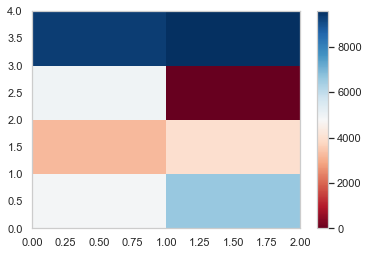

In [153]:
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

<p>The heatmap plots the target variable (PCC) proportional to colour with respect to the variables 'COMBUSTIBLE' and 'llantas' on the vertical and horizontal axis, respectively. This allows us to visualize how the PCC is related to 'COMBUSTIBLEl' and 'llantas'.</p>

<p>The default labels convey no useful information to us. Let's change that:</p>


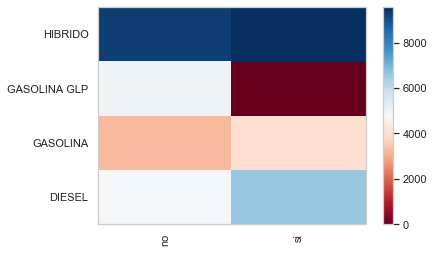

In [154]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<p>To get a better measure of the important characteristics, we look at the correlation of these variables with the car price. In other words: how is the car price dependent on this variable?</p>


<h2 id="correlation_causation">5. Correlation and Causation</h2>


<p><b>Pearson Correlation</b></p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Perfect positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Perfect negative linear correlation.</li>
</ul>


<p>Pearson Correlation is the default method of the function "corr". Like before, we can calculate the Pearson Correlation of the of the 'int64' or 'float64'  variables.</p>


In [155]:
df.corr()

,MOTOR,CV,YEARS,PLAZAS,PCC,KM,C AUTO1,C.P,edad,year,CTE.GARANTÍA,CTE..PREPARACIÓN,CTE.TOTAL,BF.NETO,GARANTIA,MESES
MOTOR,1.000000,0.792832,-0.131994,0.189301,0.448297,0.268752,-0.257052,-0.025750,-0.081331,-0.298011,-0.001592,-0.010909,-0.103200,0.190207,0.102264,-0.064860
CV,0.792832,1.000000,-0.038420,0.189880,0.463622,0.234273,-0.203508,0.014473,-0.137837,-0.074722,0.126176,-0.008152,-0.015159,0.160300,0.030823,-0.083222
YEARS,-0.131994,-0.038420,1.000000,0.004036,-0.657315,0.347413,0.265068,-0.017406,0.062976,0.704811,0.035476,0.099390,0.184031,-0.108379,0.135810,0.077076
PLAZAS,0.189301,0.189880,0.004036,1.000000,0.097727,0.041582,0.045835,-0.026473,-0.093990,-0.059062,-0.001474,0.023002,0.001553,0.135274,-0.012431,-0.044513
PCC,0.448297,0.463622,-0.657315,0.097727,1.000000,-0.284729,-0.104820,0.052423,-0.032040,-0.368248,-0.018624,-0.076771,-0.105659,0.004172,-0.072833,-0.055965
KM,0.268752,0.234273,0.347413,0.041582,-0.284729,1.000000,-0.312217,0.006566,-0.116330,0.092463,0.039675,-0.028941,-0.111484,-0.003159,0.279922,0.166487
C AUTO1,-0.257052,-0.203508,0.265068,0.045835,-0.104820,-0.312217,1.000000,0.075079,0.119082,0.639239,0.102535,0.111420,0.524170,-0.186938,-0.185208,-0.020904
C.P,-0.025750,0.014473,-0.017406,-0.026473,0.052423,0.006566,0.075079,1.000000,0.029113,0.004798,0.008147,0.185744,0.161012,-0.132223,-0.043028,0.075415
edad,-0.081331,-0.137837,0.062976,-0.093990,-0.032040,-0.116330,0.119082,0.029113,1.000000,0.073227,-0.076222,-0.026385,-0.011530,0.026815,0.069829,-0.054019
year,-0.298011,-0.074722,0.704811,-0.059062,-0.368248,0.092463,0.639239,0.004798,0.073227,1.000000,0.052088,0.158896,0.380066,-0.218837,-0.100447,0.112922


Sometimes we would like to know the significant of the correlation estimate.


<b>P-value</b>

<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the

<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>


We can obtain this information using  "stats" module in the "scipy"  library.


In [156]:
from scipy import stats

<h3>MOTOR vs. PCC</h3>


Let's calculate the  Pearson Correlation Coefficient and P-value of 'MOTOR' and 'PCC'.


In [157]:
pearson_coef, p_value = stats.pearsonr(df['MOTOR'], df['PCC'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.4482969836874622  with a P-value of P = 7.957623601210189e-21


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.448).</p>


<h3>CV ( horsepower) vs. PCC</h3>


Let's calculate the  Pearson Correlation Coefficient and P-value of 'CV' and 'price'.


In [158]:
pearson_coef, p_value = stats.pearsonr(df['CV'], df['PCC'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.46362156981287894  with a P-value of P =  2.445874770372685e-22


<h4>Conclusion:</h4>

<p>Since the p-value is $<$ 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship isn't extremely strong (~0.463, close to 1).</p>


<h3>KM vs. Price</h3>

Let's calculate the  Pearson Correlation Coefficient and P-value of 'KM' and 'PCC'.


In [159]:
pearson_coef, p_value = stats.pearsonr(df['KM'], df['PCC'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.28472851956173284  with a P-value of P =  9.143101502291187e-09


<h4>Conclusion:</h4>
<p>Since the p-value is $>$ 0.1, there is no evidence that the correlation between KM and price is significant, and the linear relationship is not strong (~0.285).</p>


<h2 id="anova">6. ANOVA</h2>


<h3>ANOVA: Analysis of Variance</h3>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant our calculated score value is.</p>

<p>If our price variable is strongly correlated with the variable we are analyzing, we expect ANOVA to return a sizeable F-test score and a small p-value.</p>


<h3>COMBUSTIBLE</h3>


<p>Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.</p>

<p>To see if different types of 'drive-wheels' impact  'price', we group the data.</p>


In [160]:
grouped_test2=df_gptest[['COMBUSTIBLE', 'PCC']].groupby(['COMBUSTIBLE'])
grouped_test2.head(2)

,COMBUSTIBLE,PCC
0,GASOLINA,956.60
1,GASOLINA,7900.00
2,DIESEL,11200.00
3,DIESEL,7300.00
298,GASOLINA GLP,5000.00
300,HIBRIDO,11450.00
319,HIBRIDO,8949.99


In [161]:
df_gptest

,COMBUSTIBLE,llantas,PCC
0,GASOLINA,si,956.6
1,GASOLINA,si,7900.0
2,DIESEL,si,11200.0
3,DIESEL,si,7300.0
4,DIESEL,si,10000.0
...,...,...,...
388,GASOLINA,no,3460.0
389,DIESEL,si,4500.0
390,GASOLINA,no,1708.0
391,GASOLINA,si,1780.0


We can obtain the values of the method group using the method "get_group".


In [162]:
grouped_test2.get_group('GASOLINA')['PCC']

0       956.6
1      7900.0
6      5183.0
10     6000.0
11     3800.0
        ...  
383    2053.0
386    2981.0
388    3460.0
390    1708.0
391    1780.0
Name: PCC, Length: 150, dtype: float64

We can use the function 'f_oneway' in the module 'stats' to obtain the <b>F-test score</b> and <b>P-value</b>.


In [163]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('GASOLINA')['PCC'], grouped_test2.get_group('DIESEL')['PCC'], grouped_test2.get_group('GASOLINA GLP')['PCC'], grouped_test2.get_group('HIBRIDO')['PCC'] )  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 31.005030575826712 , P = 5.43217791208674e-18


This is a great result with a large F-test score showing a strong correlation and a P-value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated?

Let's examine them separately.


#### GASOLINA and DIESEL


In [164]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('GASOLINA')['PCC'], grouped_test2.get_group('DIESEL')['PCC'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 79.33516577555947 , P = 2.123857276387263e-17


This is a great result with a large F-test score showing a strong correlation and a P-value of almost 0 implying almost certain statistical significance. Let's examine the other groups.


#### HIBRIDO and DIESEL


In [165]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('HIBRIDO')['PCC'], grouped_test2.get_group('DIESEL')['PCC'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 5.671751471351961 , P = 0.0180207900717052


 There is moderate evidence that the correlation is significant.

<h4>HIBRIDO and GASOLINA</h4>


In [166]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('HIBRIDO')['PCC'], grouped_test2.get_group('GASOLINA')['PCC'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 44.26080991464511 , P = 4.73953189852562e-10


We notice that ANOVA for the categories `HIBRIDO` and `GASOLINA` yields a high p-value > 0.1, so the calculated F-test score is not very statistically significant. This suggests we can't reject the assumption that the means of these two groups are the same, or, in other words, we can't conclude the difference in correlation to be significant.


<h3>Conclusion: Important Variables</h3>


<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:

<ul>
    <li>MOTOR</li>
    <li>CV</li>
    <li>KM</li>
    
</ul>

Discrete numerical variable:

<ul>
    <li>YEARS</li>
    <li>year</li>
     
</ul>

Categorical variables:

<ul>
    <li>COMBUSTIBLE</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>


<h2 id="anova">7. Analysis of a binary classification problem </h2>

 Our target variable will be MESES (1= good sale, 2= bad sale) a binary classification problem.

In [167]:
df['MESES'].value_counts()

1.0    190
2.0    104
Name: MESES, dtype: int64

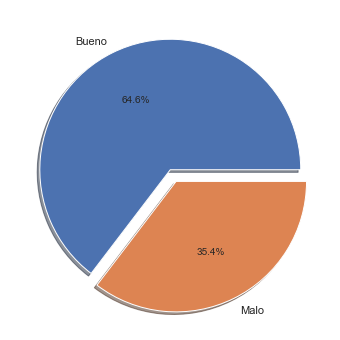

In [168]:
porc= df['MESES'].value_counts(normalize  = True)

fig, ax = plt.subplots(figsize = (6,6))
ax.pie(porc, labels = ['Bueno','Malo'], autopct='%1.1f%%', shadow = True, explode = [0,0.1]);

We are faced with an unbalanced problem. Ideally, it should be balanced 50% of 1 and 2.

Let's look now if there is missing data

In [169]:
df.isnull().sum()

MARCA MODELO          0
MOTOR                 0
CAMBIO                0
CV                    0
COMBUSTIBLE           0
COLOR                99
YEARS                 0
PLAZAS               99
PCC                   0
KM                    0
C AUTO1             166
tipo                  0
llantas               0
C.P                   0
localidad             0
provincia             1
pais                  0
nacionalidad          0
sexo                  0
edad                101
year                  0
CTE.GARANTÍA         99
CTE..PREPARACIÓN     99
CTE.TOTAL            99
BF.NETO              99
GARANTIA             99
MESES                99
GARANTIA2            99
dtype: int64

In [170]:
pct = df.isnull().sum() / df.shape[0] * 100
pct[pct > 0]

COLOR               25.190840
PLAZAS              25.190840
C AUTO1             42.239186
provincia            0.254453
edad                25.699746
CTE.GARANTÍA        25.190840
CTE..PREPARACIÓN    25.190840
CTE.TOTAL           25.190840
BF.NETO             25.190840
GARANTIA            25.190840
MESES               25.190840
GARANTIA2           25.190840
dtype: float64

We see that we have nan values in continuous variables and categorical data. We are going to eliminate those categorical variables and discrete that are not important to predict MESES, and the continuous ones we will replace the nan by mean programming it in a loop.
We look to our person correlation heatmap and see that the more importan values for predicting MESES are CTE.TOTAL 0.36 and BF.NETO - 0.46

In [171]:
df.drop(['MARCA MODELO','PLAZAS', 'C.P', 'year','GARANTIA','CAMBIO','COLOR','tipo','llantas','COMBUSTIBLE', 'localidad', 'provincia', 'pais', 'nacionalidad','GARANTIA2', 'sexo' ], axis = 'columns', inplace=True)


In [172]:
pct = df.isnull().sum() / df.shape[0] * 100
pct[pct > 0]

C AUTO1             42.239186
edad                25.699746
CTE.GARANTÍA        25.190840
CTE..PREPARACIÓN    25.190840
CTE.TOTAL           25.190840
BF.NETO             25.190840
MESES               25.190840
dtype: float64

In [173]:
cols_to_input = pct[pct>0].index
cols_to_input = cols_to_input.drop(['MESES'])

In [174]:
for col in cols_to_input:
    df[col].fillna(df[col].mean(), inplace = True)

missing data after removing.

In [175]:
df.isnull().sum()

MOTOR                0
CV                   0
YEARS                0
PCC                  0
KM                   0
C AUTO1              0
edad                 0
CTE.GARANTÍA         0
CTE..PREPARACIÓN     0
CTE.TOTAL            0
BF.NETO              0
MESES               99
dtype: int64

We use kde= to plot a gaussian kernel density estimate.

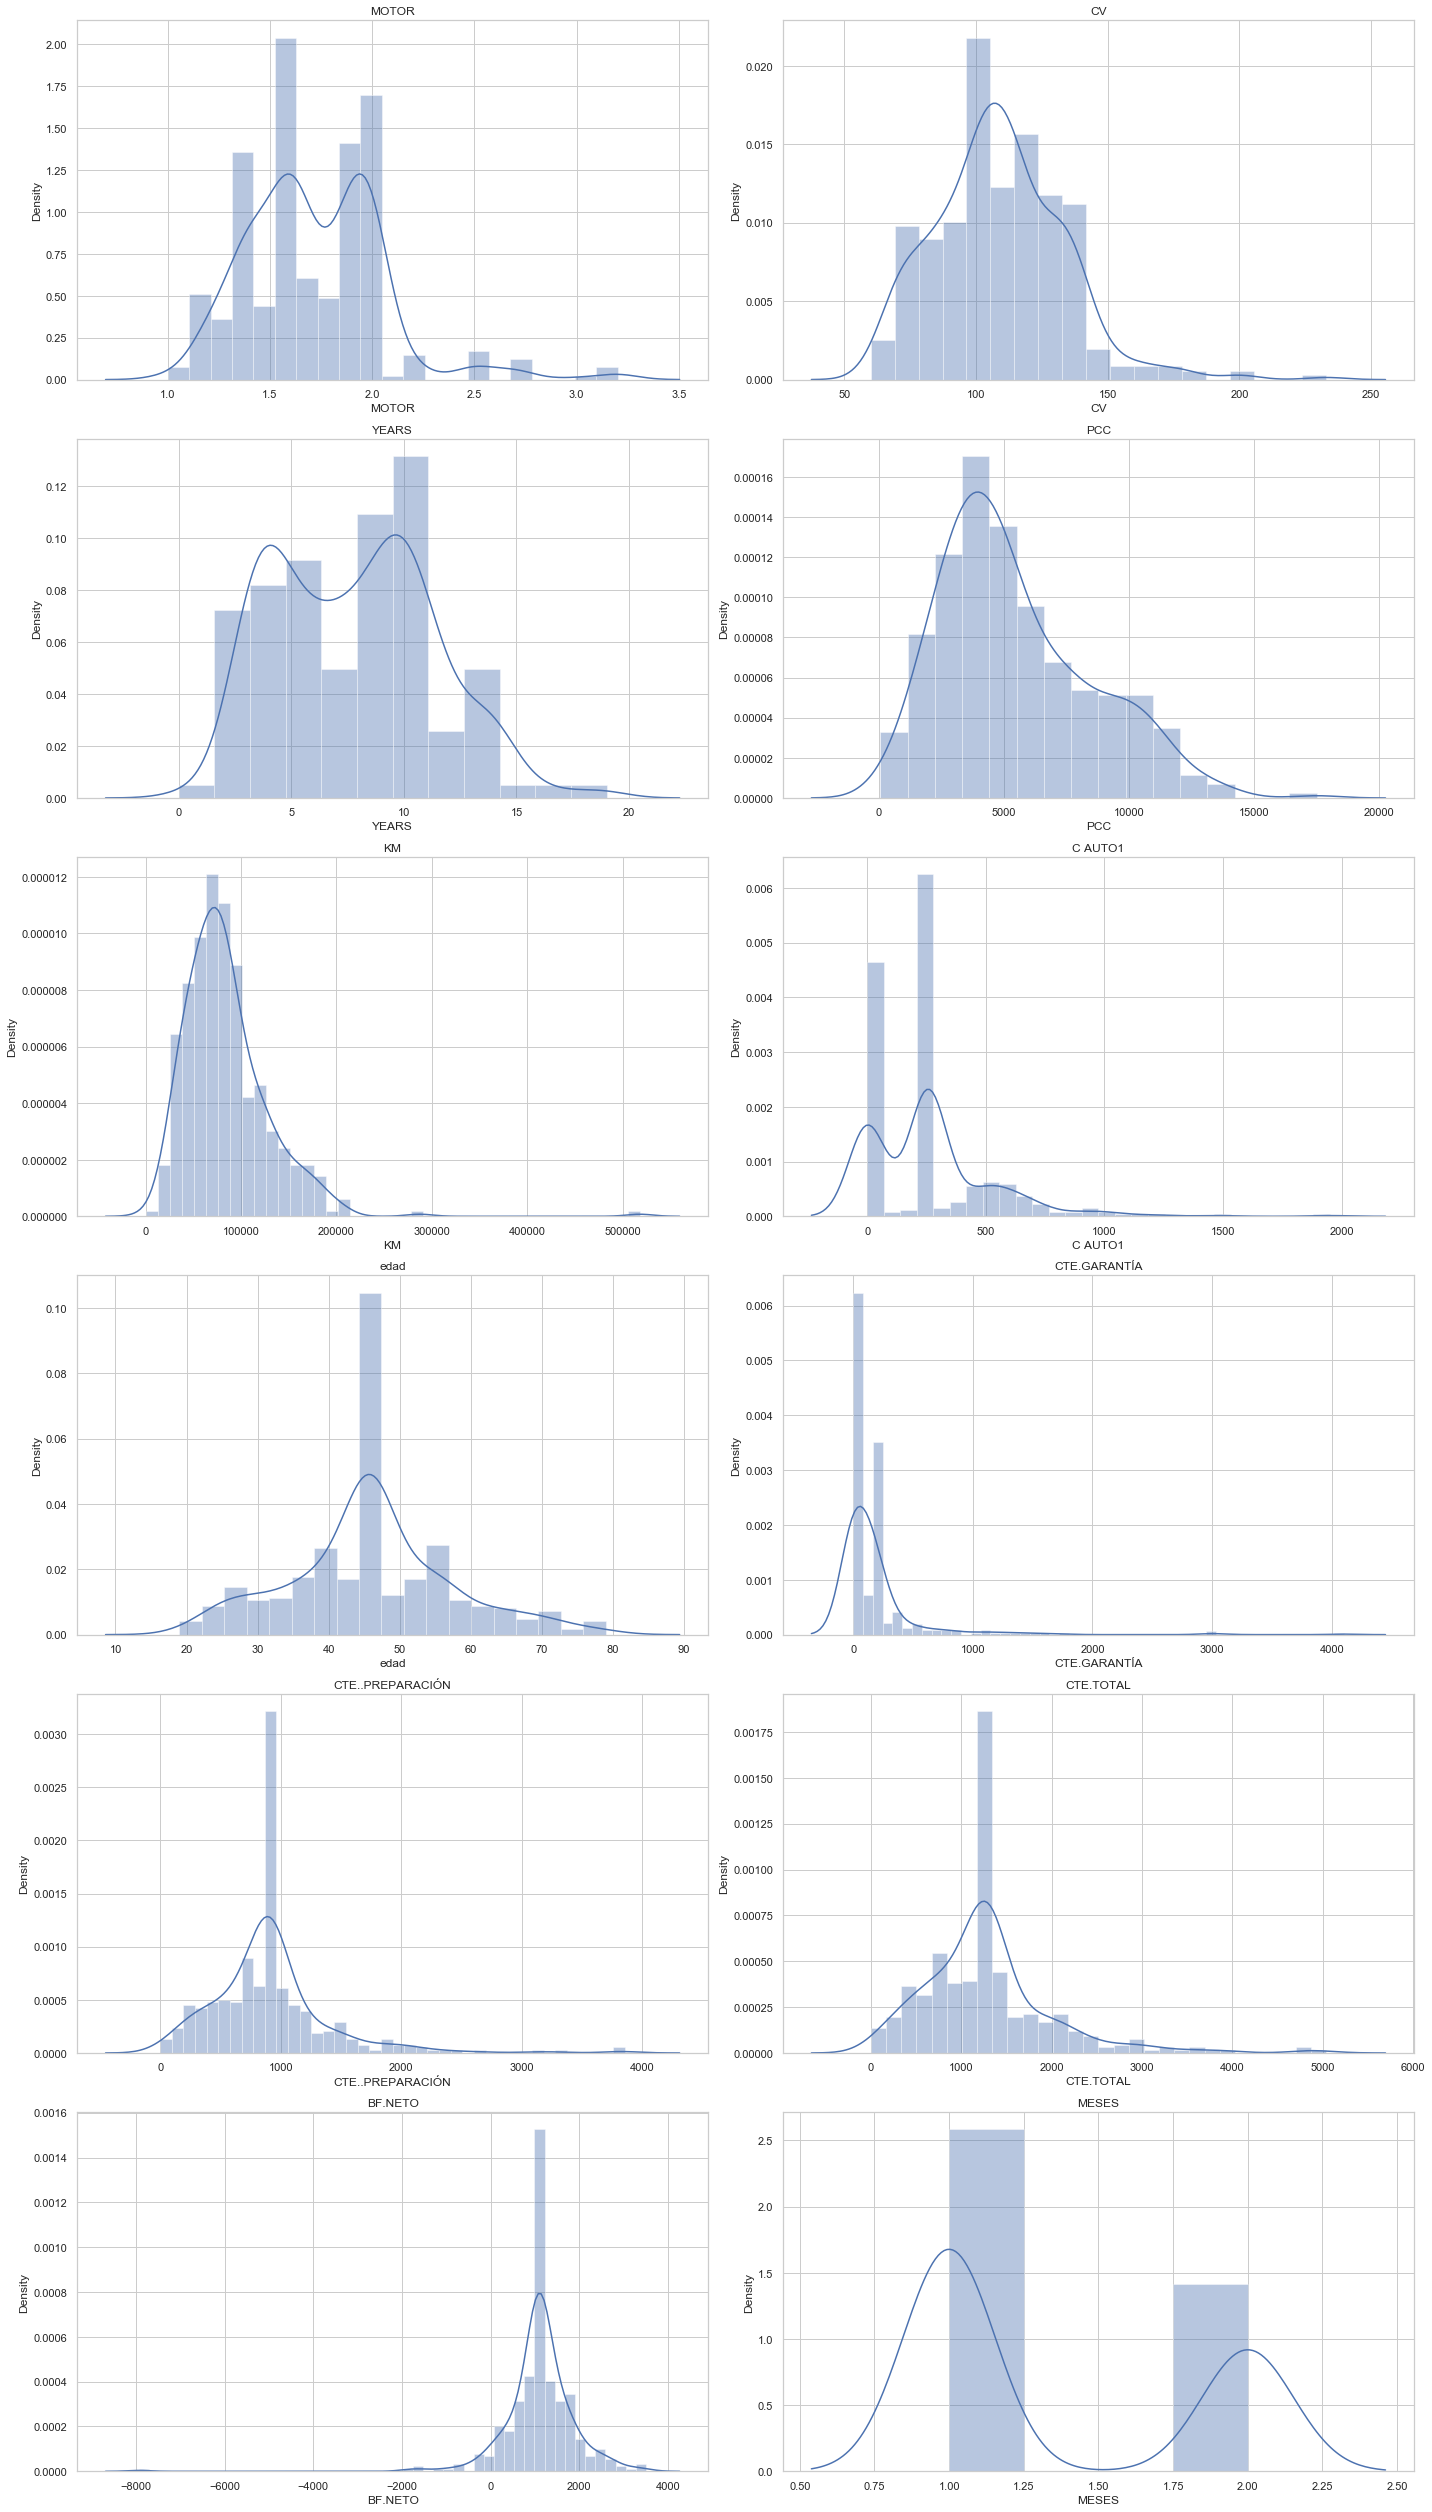

In [176]:
cols = df.columns

fig, ax = plt.subplots(nrows=int(np.ceil(len(cols)/2)), ncols = 2, figsize = (20, 35))

i,j = 0,0
for c in cols:
    sns.distplot(df[c], hist = True, kde = True, ax = ax[i,j])
    
    ax[i,j].set_title(c)
    
    j+=1
    if j==2:
        i+=1
        j=0
        
plt.tight_layout()

import warnings
warnings.filterwarnings('ignore')

Let's now measure the skewness and kurtosis of each variable.

Skewness is a measure of symmetry. A symmetric dataset has a skewness equal to 0. A normal distribution has a skewness equal to 0.
Kurtosis is a measure of the tails of the distribution. The heavier the tails, the greater the kurtosis. A kurtosis equal to zero would approximate a normal distribution.

In [177]:
for c in cols:
    print(f"------{c}------")
    print("Skewness: %f" % df[c].skew())
    print("Kurtosis: %f" % df[c].kurt())

------MOTOR------
Skewness: 1.060987
Kurtosis: 2.887057
------CV------
Skewness: 0.735388
Kurtosis: 1.841099
------YEARS------
Skewness: 0.332396
Kurtosis: -0.477655
------PCC------
Skewness: 0.779950
Kurtosis: 0.183835
------KM------
Skewness: 2.773485
Kurtosis: 19.819767
------C AUTO1------
Skewness: 1.781505
Kurtosis: 6.142684
------edad------
Skewness: 0.248389
Kurtosis: 0.308166
------CTE.GARANTÍA------
Skewness: 5.718092
Kurtosis: 43.866071
------CTE..PREPARACIÓN------
Skewness: 1.950044
Kurtosis: 7.871179
------CTE.TOTAL------
Skewness: 1.629853
Kurtosis: 5.151198
------BF.NETO------
Skewness: -3.303353
Kurtosis: 34.687200
------MESES------
Skewness: 0.614936
Kurtosis: -1.633010


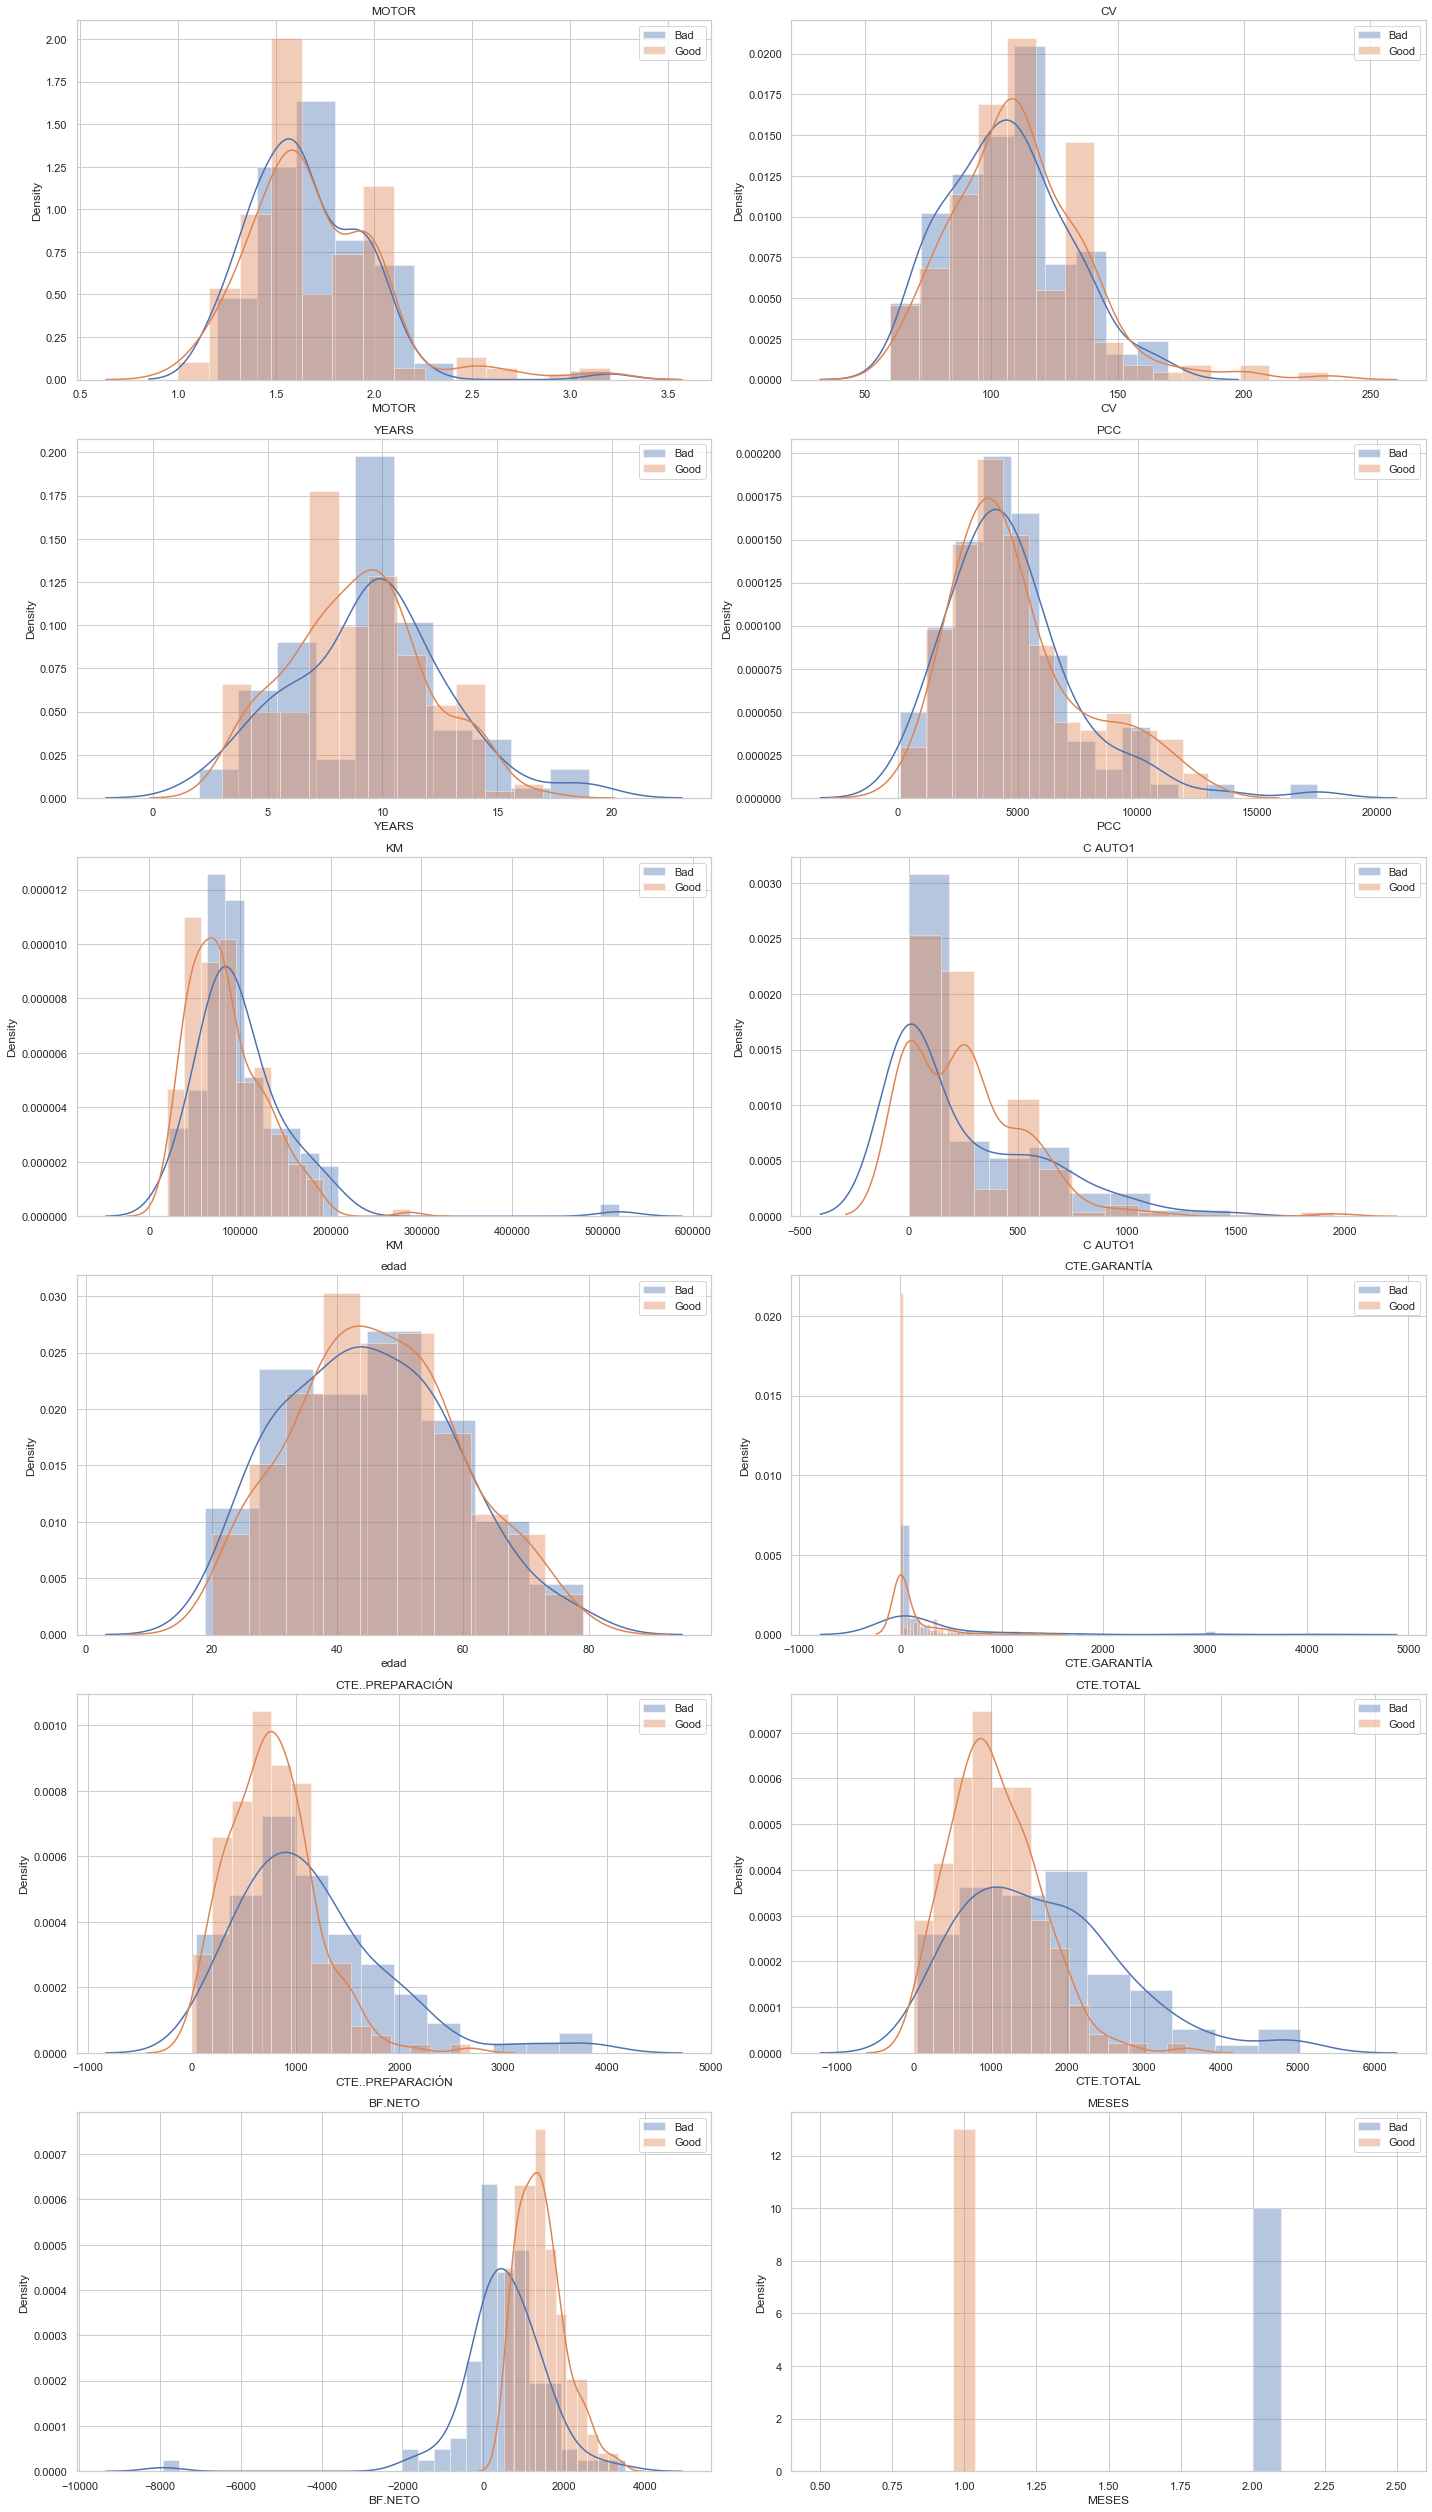

In [178]:
cols = df.columns

fig, ax = plt.subplots(nrows=int(np.ceil(len(cols)/2)), ncols = 2, figsize = (20, 35))

i,j = 0,0
for c in cols:
    sns.distplot(df.query('MESES == 2')[c], hist = True, kde = True, ax = ax[i,j], label = 'Bad')
    sns.distplot(df.query('MESES == 1')[c], hist = True, kde = True, ax = ax[i,j], label = 'Good')

    ax[i,j].set_title(c)
    ax[i,j].legend()
    
    j+=1
    if j==2:
        i+=1
        j=0
        
plt.tight_layout()

import warnings
warnings.filterwarnings('ignore')


Here we can begin to draw some conclusions in terms of variables:

Good sales have less KM.
Good sales have more C AUTO1.
Good sales have less CTE.PREPARACION.
Good sales have less CTE.TOTAL.
Good sales have more BF.NETO.
The MOTOR, CV, YEARS, PCC and edad variables will have little importance.

Let's analyze if we have anomalous values, or outliers. Outliers by definition are observations with strange values, either excessively high, or excessively low. These values affect in parametric algorithms, and a little in tree-based models.

To discover those anomalous values we are going to use  boxplots charts. We will do it by separating by 'good' and 'bad' wines.

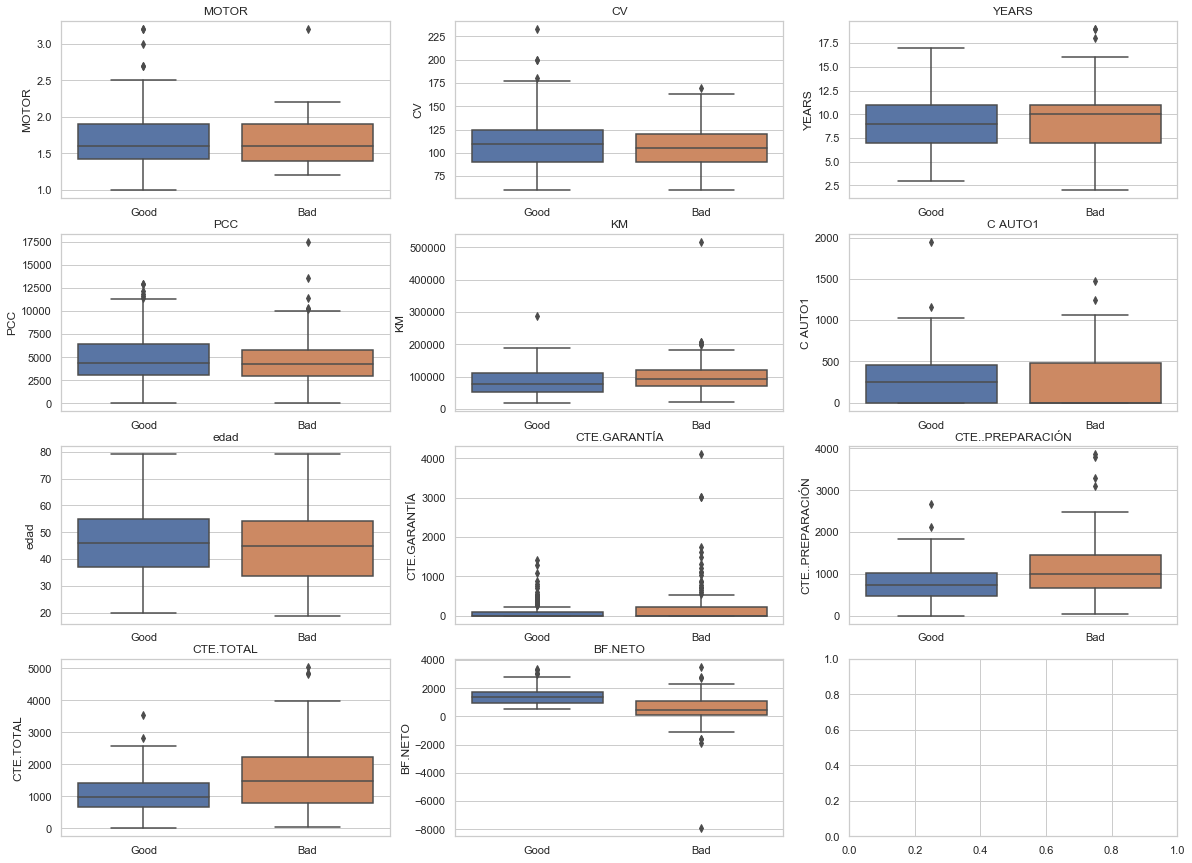

In [179]:
fig, ax = plt.subplots(nrows=int(np.ceil(len(cols)/3)), ncols = 3, figsize = (20, 15))

i,j = 0,0
for c in cols.delete(-1):
    sns.boxplot(x = 'MESES', y = c, data = df, ax = ax[i,j], )
    ax[i,j].set_title(c)
    ax[i,j].set_xlabel('')
    ax[i,j].set_xticklabels(np.array(['Good', 'Bad']))
    
    j+=1
    if j==3:
        j=0
        i+=1

In [180]:
df['MESES'].value_counts()

1.0    190
2.0    104
Name: MESES, dtype: int64

With these graphs we can also get an idea of the variables that describe our target variable. If we look for example at the variable 'BF.NETO', we can draw the conclusion that good sales tend to have more BF.NETO, and that those bad sales with a lot of BF.NETO are still strange observations, or outliers.

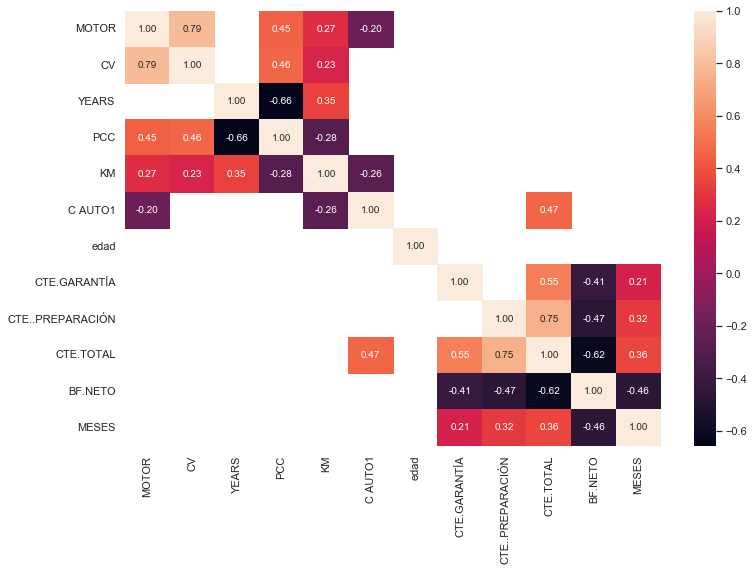

In [181]:
fig, ax = plt.subplots(figsize = (12, 8))

sns.heatmap(df.corr()[(df.corr() > 0.2) | (df.corr() < -0.2)], annot=True, fmt = '.2f')

If we focus on our target we can see that the variables with which it has a greater correlation are:
CTE.GARANTÍA → -0.21
CTE..PREPARACIÓN → 0.32
CTE.TOTAL → 0.36
BF.NETO → -0.46
With this correlation matrix, I would say that the most important variable in our model is going to be BF.NETO.

Let's look at some scatterplots between these variables.

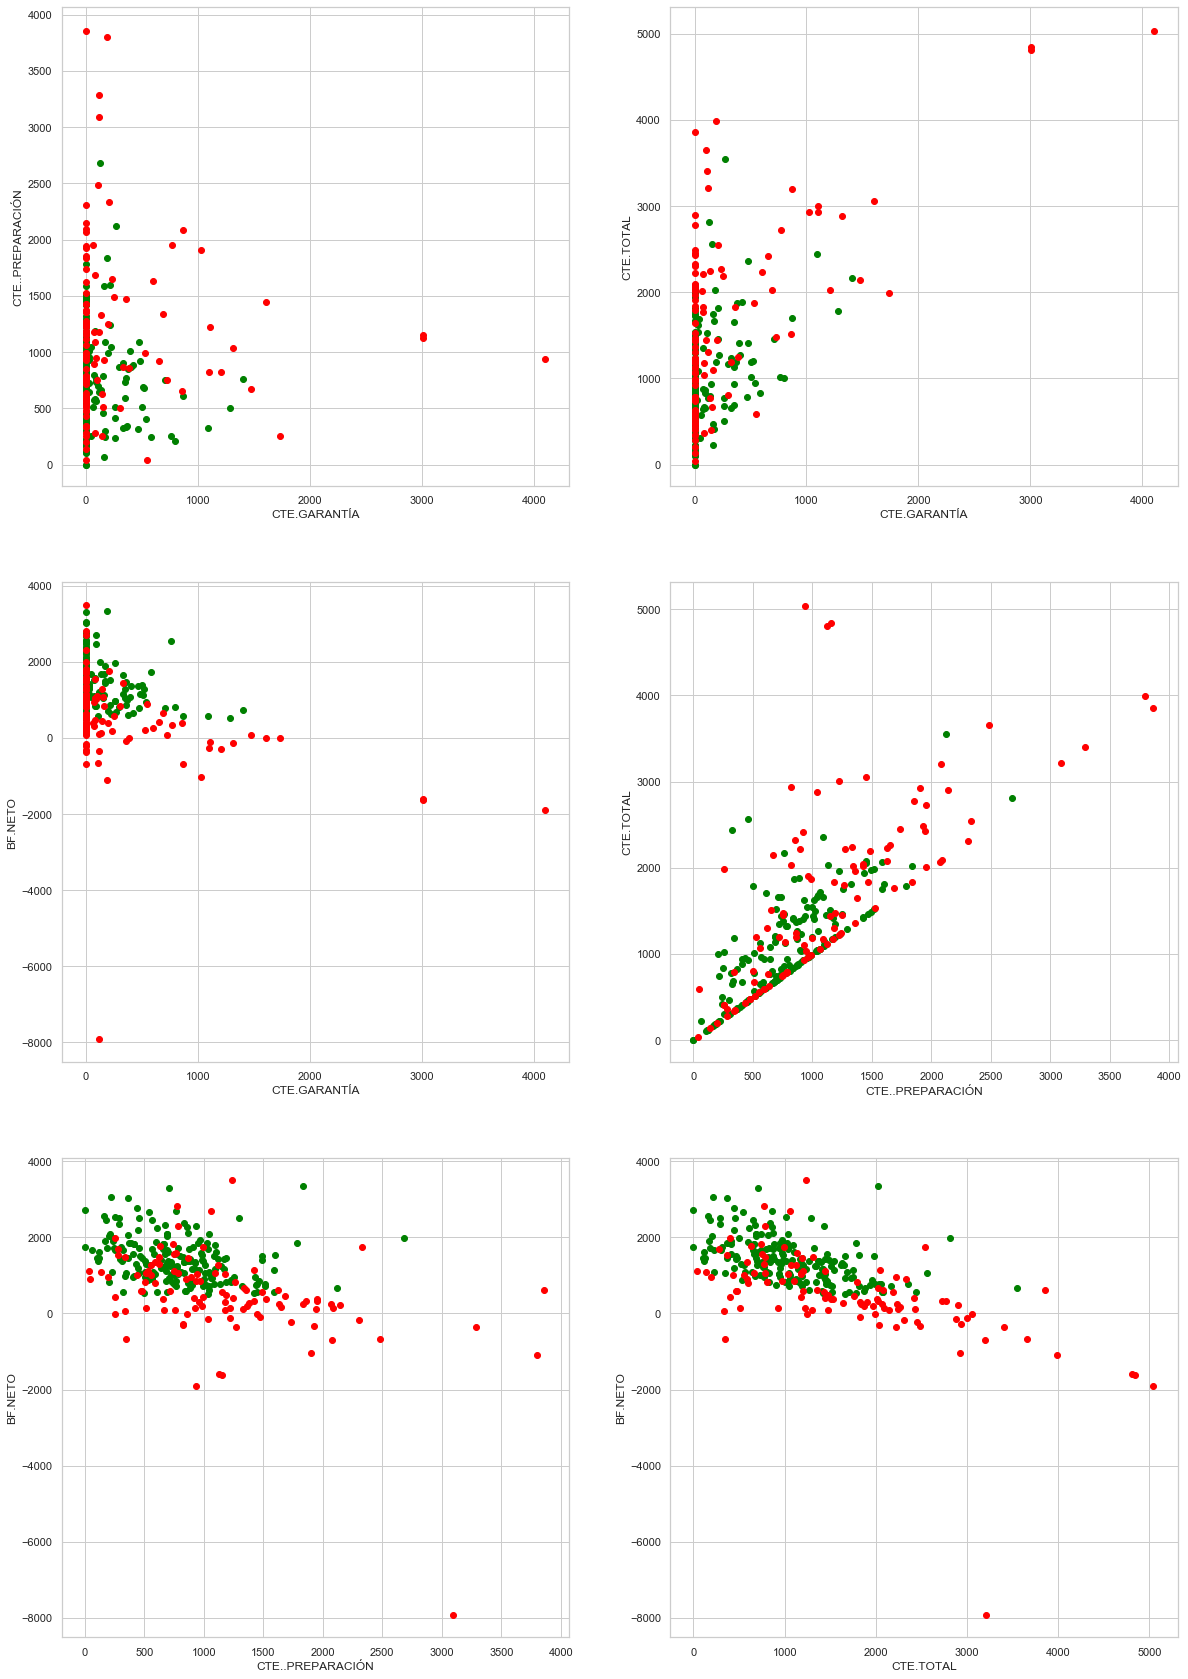

In [206]:
import itertools

fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (20, 30))

good = df.query('MESES == 1')
bad = df.query('MESES == 2')

i,j = 0,0
for comb in itertools.combinations(['CTE.GARANTÍA', 'CTE..PREPARACIÓN', 'CTE.TOTAL', 'BF.NETO'], 2):
    ax[i,j].scatter(x = good[comb[0]], y = good[comb[1]], c = 'green')
    ax[i,j].scatter(x = bad[comb[0]], y = bad[comb[1]], c = 'red')
    ax[i,j].set_xlabel(comb[0])
    ax[i,j].set_ylabel(comb[1])

    j+=1
    if j==2:
        i+=1
        j=0

For the importance of variables there are numerous techniques, and even libraries designed exclusively for them. We, we're going to use just one of them.

In our case, we will calculate the importance of variables by making direct use of a classification model. By using a tree-based model, the tree itself will be able to inform us of those variables that are most important, either using entropy or the gini index.

In [184]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

In [186]:
df.isnull().sum()

MOTOR                0
CV                   0
YEARS                0
PCC                  0
KM                   0
C AUTO1              0
edad                 0
CTE.GARANTÍA         0
CTE..PREPARACIÓN     0
CTE.TOTAL            0
BF.NETO              0
MESES               99
dtype: int64

Before split we will eliminate those rows with nan values of MESES.

In [192]:
df=df.dropna()

In [193]:
df.isnull().sum()

MOTOR               0
CV                  0
YEARS               0
PCC                 0
KM                  0
C AUTO1             0
edad                0
CTE.GARANTÍA        0
CTE..PREPARACIÓN    0
CTE.TOTAL           0
BF.NETO             0
MESES               0
dtype: int64

In [194]:
train, test = train_test_split(df, test_size = 0.3, stratify = df['MESES'], random_state = 3)

In [195]:
X_train = train.drop('MESES', axis = 1)
y_train = train['MESES']

X_test = test.drop('MESES', axis = 1)
y_test = test['MESES']

In [196]:
y_train.value_counts(normalize = True)

1.0    0.643902
2.0    0.356098
Name: MESES, dtype: float64

In [197]:
y_test.value_counts(normalize = True)

1.0    0.651685
2.0    0.348315
Name: MESES, dtype: float64

In [198]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1234)

dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1234)

In [199]:
dtc.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.16536489, 0.05006516, 0.        , 0.        , 0.        ,
       0.78456995])

In [200]:
feature_importance = pd.Series(dtc.feature_importances_, index = X_train.columns)
imp = feature_importance[feature_importance > 0]
imp

C AUTO1    0.165365
edad       0.050065
BF.NETO    0.784570
dtype: float64

Text(0.5, 1.0, 'Importancia de variables')

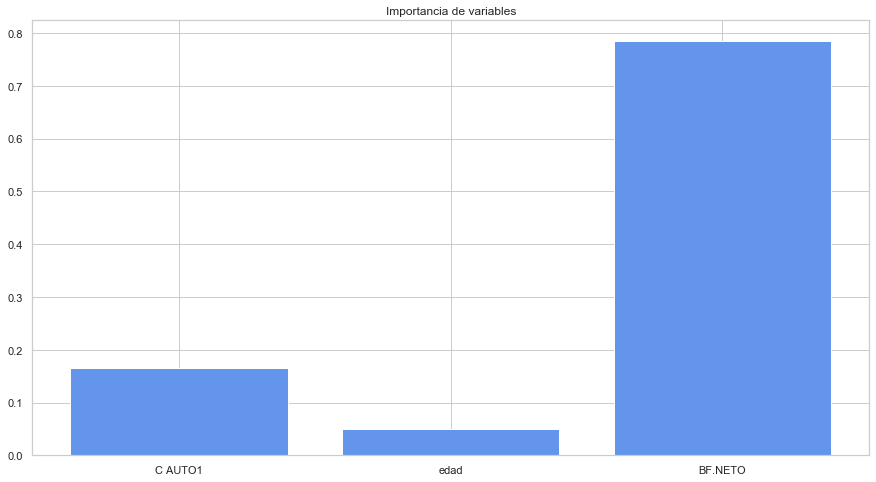

In [204]:

fig, ax = plt.subplots(figsize = (15, 8))

ax.bar(x = imp.index, height = imp.values, color = 'cornflowerblue')


ax.set_title('Importancia de variables')

Now we can confirm that the most important variable for a good sale is the BF. NETO.